<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/height_weight_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measuring association between variables: from variance to information

## Fayyaz Minhas

We want to understand **how variables are associated** and how this can be expressed in two complementary ways:

**Classical statistics view**
- covariance  
- correlation  
- variance reduction when conditioning  

**Information theoretic view**
- entropy  
- KL divergence  
- mutual information  
- total correlation  

Key conceptual idea:

> If knowing one variable reduces our uncertainty about another, then the variables share information.

This provides a principled way to:
- quantify association
- understand redundancy
- explain why dimensions can be reduced  
  (if two variables carry similar information, one can partly replace the other)

We will use a simple real-world example:
**height and weight**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

np.random.seed(7)

height = np.array([54,55,55,56,60,62,68,69,72,72,73,74,78,86], dtype=float)
weight = 0.9*height + 20 + np.array([-0.5,3.5,1.0,5.0,-2.0,6.0,7.5,0.5,4.0,3.0,2.5,8.0,5.0,6.0])

df = pd.DataFrame({"height_in": height, "weight_lb": weight})
df

,height_in,weight_lb
0,54.0,68.1
1,55.0,73.0
2,55.0,70.5
3,56.0,75.4
4,60.0,72.0
5,62.0,81.8
6,68.0,88.7
7,69.0,82.6
8,72.0,88.8
9,72.0,87.8


## Step 1: Visualise the data

We start with the joint plot of the two variables.

If taller people tend to be heavier, the cloud will slope upward.
This is the first visual indication of **association**.

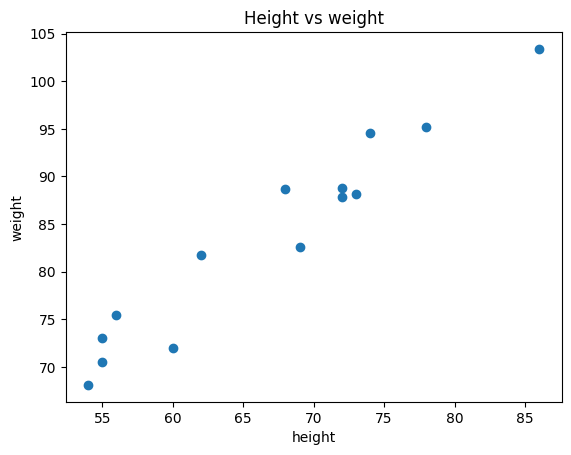

In [2]:
plt.figure()
plt.scatter(df["height_in"], df["weight_lb"])
plt.xlabel("height")
plt.ylabel("weight")
plt.title("Height vs weight")
plt.show()

## Step 2: Marginal distributions

A **marginal distribution** describes a single variable on its own, ignoring all others.

If we have two variables, height $H$ and weight $W$, their joint distribution is $P(H,W)$.  
The marginal distributions are obtained by summing (or integrating) over the other variable:

$$
P(H) = \sum_w P(H,w), \qquad
P(W) = \sum_h P(h,W).
$$

These describe how each variable behaves individually.

---

### What marginals tell us

From a marginal distribution we can understand:

**Typical values**  
Where most observations lie, often summarised by the mean or median.

**Spread**  
How widely values vary, captured by variance or standard deviation.

**Shape**  
Whether the distribution is symmetric, skewed, or heavy-tailed.

For example, a histogram of height shows:
- the range of heights in the sample
- whether most people cluster around a typical height
- whether there are unusually tall or short individuals

Similarly for weight.

These summaries are essential for understanding each variable in isolation.

---

### What marginals do *not* tell us

Marginal distributions ignore how variables relate to one another.

Two variables can have identical marginals yet be strongly related.

For instance:
- Heights might be evenly spread between short and tall.
- Weights might also be evenly spread between light and heavy.

But this does not tell us whether:
- tall people tend to be heavy
- short people tend to be light
- or whether height and weight are unrelated

All of those scenarios can share the same marginal histograms.

So marginals describe **individual variability**, but not **association**.

---

### Why this matters

If we only look at marginals:
- we know how uncertain each variable is on its own
- but we do not know whether knowing one helps predict the other

To understand association, we must look at the **joint distribution** and how it differs from what we would expect if the variables were independent.

This distinction becomes central later:

- marginals quantify uncertainty in single variables  
- the joint distribution reveals dependence  
- comparing the joint to the product of marginals allows us to measure shared information


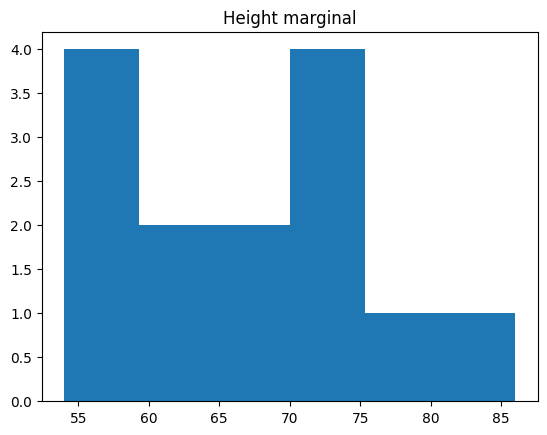

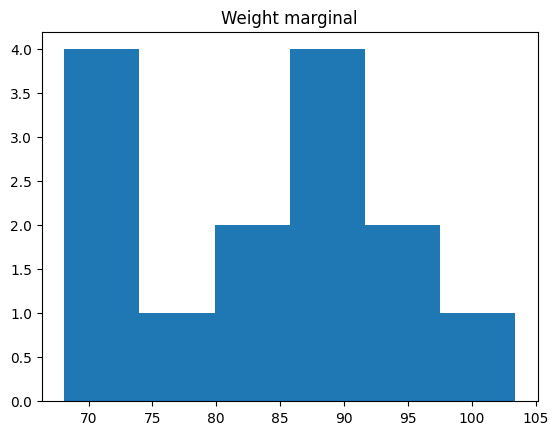

In [3]:
plt.figure()
plt.hist(df["height_in"], bins=6)
plt.title("Height marginal")
plt.show()

plt.figure()
plt.hist(df["weight_lb"], bins=6)
plt.title("Weight marginal")
plt.show()

## Step 3: Mean and variance

Before studying relationships between variables, we first understand how to describe a **single variable**.

Two fundamental summaries are the mean and the variance.

### Mean

The mean (or average) of a variable is

$$
\bar x = \frac{1}{n}\sum_i x_i.
$$

This represents the typical or central value of the data.

**Interpretation**

- If we had to guess a value without any additional information, the mean is often our best single guess.
- It minimises the average squared error between the guess and the data.
- It provides a reference point around which deviations are measured.

However, the mean alone does not tell us how much variability exists around it.

---

### Variance

Variance measures how spread out the values are around the mean:

$$
\mathrm{Var}(X)=\frac{1}{n-1}\sum_i (x_i-\bar x)^2.
$$

Each observation is compared to the mean, the deviation is squared, and we average those squared deviations.

We divide by $n-1$ rather than $n$ to obtain an unbiased estimate from a finite sample.

---

### Why square the deviations?

If we simply averaged deviations $(x_i-\bar x)$, positive and negative values would cancel out.  
Squaring ensures that:
- all deviations contribute positively
- larger deviations contribute more strongly

This makes variance sensitive to how widely the data are dispersed.

The square root of the variance is the **standard deviation**, which returns to the original units of measurement.

---

### Intuition: uncertainty in a single variable

Variance measures how uncertain we are about the value of a variable.

- Small variance  
  Values are tightly clustered near the mean  
  The variable is predictable

- Large variance  
  Values are widely spread  
  The variable is harder to predict

So variance quantifies how much variability exists before we know anything else about the system.

---

### Geometric view

If we imagine data points along a number line:
- the mean is the centre of mass
- the variance measures how far points lie from that centre on average

In higher dimensions, variance generalises to covariance matrices, which measure spread and orientation of data clouds.

---

### Connection to prediction

If we try to predict a variable using only its mean, the average squared prediction error we make is exactly the variance:

$$
\mathbb{E}[(X-\bar x)^2] = \mathrm{Var}(X).
$$

So variance can be interpreted as the **baseline uncertainty** before we condition on any other information.

Later we will see:
- conditioning on another variable can reduce this uncertainty
- the reduction in uncertainty reflects association between variables

---

### Bridge to information theory

Variance plays a central role for numeric data in classical statistics:
it measures spread and unpredictability.

In information theory, the analogous quantity is **entropy**.

- variance measures spread of values
- entropy measures spread of probability mass
- both quantify uncertainty before we observe anything else

When we later discuss mutual information, we will see that:
- conditioning on another variable reduces entropy
- just as conditioning reduces variance in regression

This parallel provides a bridge between classical statistics and information theory.


In [4]:
print(df.mean())
print(df.var())

height_in    66.714286
weight_lb    83.578571
dtype: float64
height_in     97.912088
weight_lb    113.054121
dtype: float64


## Step 4: Covariance and correlation

To quantify how two variables vary together, we begin with **covariance**.

### Covariance

$$
\mathrm{Cov}(X,Y)=\frac{1}{n-1}\sum_i (x_i-\bar x)(y_i-\bar y)
$$

Here:
- $\bar x$ and $\bar y$ are the sample means  
- $(x_i-\bar x)$ and $(y_i-\bar y)$ measure deviations from typical values  

Each term multiplies the deviations for the same observation.

**Interpretation**

- If both variables tend to be above their means at the same time, the product is positive.
- If one is above its mean while the other is below, the product is negative.
- Averaging these products tells us whether the variables move together.

So covariance captures **co-movement**.

If tall people tend to be heavier:
- deviations from mean height and weight usually have the same sign  
- covariance is positive

If tall people tended to be lighter:
- deviations would have opposite signs  
- covariance would be negative

If there is no consistent relationship:
- positive and negative products cancel  
- covariance is near zero

---

### Units and scale

Covariance depends on the units of measurement.

For example:
- height in inches and weight in pounds gives a different numerical covariance than height in centimetres and weight in kilograms.

This makes covariance difficult to compare across datasets or variables.

---

### Correlation

To remove dependence on units and scale, we normalise covariance by the standard deviations:

$$
\rho = \frac{\mathrm{Cov}(X,Y)}{\sigma_X \sigma_Y}.
$$

This produces the **correlation coefficient**.

Properties:
- $-1 \le \rho \le 1$
- $\rho = 1$ indicates perfect positive linear relationship
- $\rho = -1$ indicates perfect negative linear relationship
- $\rho = 0$ indicates no linear relationship

Because of this normalisation, correlation is dimensionless and comparable across contexts.

---

### Geometric interpretation

If we centre the data by subtracting means, each variable can be viewed as a vector of deviations.

Then:
- covariance is proportional to the dot product of these centred vectors
- correlation is the cosine of the angle between them

So:
- strong positive correlation means the vectors point in similar directions
- strong negative correlation means they point in opposite directions
- near-zero correlation means they are nearly orthogonal

This geometric view connects correlation to projection and variance explained, which later underlies principal component analysis.

---

### Link to variance

Variance is just covariance with itself:

$$
\mathrm{Var}(X) = \mathrm{Cov}(X,X).
$$

So covariance generalises the idea of spread to pairs of variables.

---

### Conditional variance and prediction

If two variables are correlated, knowing one helps predict the other.

For example, if height and weight are correlated:
- knowing height reduces uncertainty about weight
- the remaining uncertainty can be described by conditional variance

This idea of **uncertainty reduction when conditioning** will later reappear in the information-theoretic setting as entropy reduction and mutual information.

---

### Limitations of correlation

Correlation only measures **linear** relationships.

Examples where correlation can be misleading:
- a curved relationship (e.g. quadratic)
- circular or ring-shaped data
- monotonic but nonlinear relationships

In such cases:
- correlation may be small or zero
- yet the variables are clearly dependent

This motivates more general measures of association, such as mutual information, which can detect nonlinear and non-Gaussian dependencies.

---

### Summary

Covariance and correlation quantify how variables move together.

- Covariance measures co-variation in original units.
- Correlation rescales this to a unitless measure between −1 and 1.
- Both focus on linear relationships.

They provide the classical statistical foundation for understanding association, which we will later generalise using entropy, KL divergence, and mutual information.


In [5]:
print(df.cov())
print(df.corr())

            height_in   weight_lb
height_in   97.912088  101.901099
weight_lb  101.901099  113.054121
           height_in  weight_lb
height_in    1.00000    0.96854
weight_lb    0.96854    1.00000


## Step 5: Conceptual bridge to information

We now move from classical measures of spread and association to the central idea of **information**.

Suppose we want to guess a person's weight.

### Before we know height

If we know nothing else about the person, our best guess might be the average weight.  
But there is still a lot of uncertainty:

- people of the same population can vary widely in weight  
- our prediction errors can be large  
- the variance of weight reflects this baseline uncertainty

So without additional information, uncertainty about weight is relatively high.

---

### After we learn height

Now suppose we are told the person's height.

Height and weight are related.  
Knowing height allows us to narrow down plausible values of weight:

- a very tall person is unlikely to be extremely light  
- a very short person is unlikely to be extremely heavy  
- predictions become more precise

So the spread of plausible weight values becomes smaller.  
Our uncertainty shrinks.

This reduction in uncertainty is the key conceptual step.

---

### Information as uncertainty reduction

Information can be understood as:

> How much our uncertainty decreases when we observe something.

In this example:
- uncertainty in weight before knowing height is large  
- uncertainty in weight after knowing height is smaller  

The difference between these two uncertainties is the **information that height provides about weight**.

If height and weight were unrelated:
- knowing height would not change our uncertainty  
- there would be no information gained

If height perfectly determined weight:
- knowing height would remove all uncertainty  
- height would contain full information about weight

In real data, we are somewhere between these extremes.

---

### Classical statistics view

In classical terms:
- we might measure uncertainty using variance  
- conditioning on height reduces the variance of weight  
- the reduction reflects association

This is the idea behind regression:  
predicting one variable using another reduces prediction error.

---

### Information-theoretic view

In information theory:
- uncertainty is measured using entropy  
- conditioning reduces entropy  
- the reduction in entropy is mutual information

So the same conceptual story appears in two languages:

| Classical statistics | Information theory |
|---------------------|-------------------|
| Variance | Entropy |
| Conditional variance | Conditional entropy |
| Variance reduction | Mutual information |

Both describe how much knowing one variable helps us predict another.

---

### Why this bridge matters

This perspective allows us to unify several ideas:

- association between variables  
- prediction and regression  
- dimensionality reduction  
- redundancy in data  

If one variable reduces uncertainty about another, then the two share information.

This idea will lead us naturally to:
- entropy as a measure of uncertainty  
- KL divergence as model mismatch  
- mutual information as reduction in uncertainty  


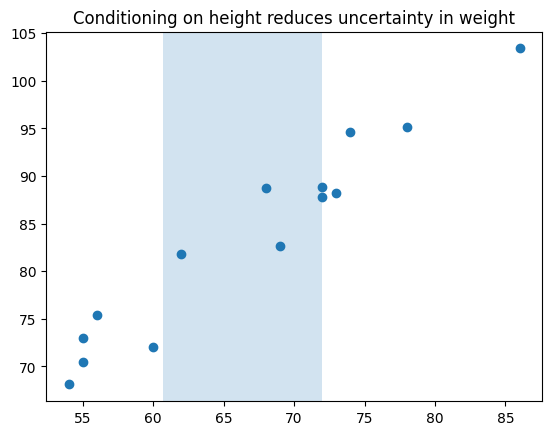

In [6]:
h_low, h_high = df["height_in"].quantile([1/3, 2/3])

plt.figure()
plt.scatter(df["height_in"], df["weight_lb"])
plt.axvspan(h_low, h_high, alpha=0.2)
plt.title("Conditioning on height reduces uncertainty in weight")
plt.show()

## Step 6: Discretise to estimate probabilities

Information-theoretic quantities such as entropy, KL divergence, and mutual information are defined in terms of **probability distributions**.  
To compute these from data, we need estimates of probabilities.

Our height and weight data are continuous variables.  
To build intuition and keep calculations transparent, we convert them into a small number of discrete categories.

We do this by **binning** the values.

- height → short, mid, tall  
- weight → light, mid, heavy  

Each observation now falls into one height bin and one weight bin.

---

### Why discretise?

Discretisation allows us to:

- count how often each outcome occurs  
- estimate probabilities using relative frequencies  
- construct a joint probability table  
- compute entropy and mutual information directly

For example, if 5 out of 14 people are in the “mid height” bin, then

$$
P(H=\text{mid}) = \frac{5}{14}.
$$

Similarly, if 3 people are “tall and heavy”, then

$$
P(H=\text{tall}, W=\text{heavy}) = \frac{3}{14}.
$$

These empirical proportions serve as probability estimates.

---

### Marginals and joint distribution

From the binned data we can estimate:

**Marginal distributions**
- $P(H)$: distribution of height categories  
- $P(W)$: distribution of weight categories  

**Joint distribution**
- $P(H,W)$: distribution over pairs of categories  

The joint distribution tells us how often each combination occurs.  
This is the key object for measuring association.

---

### Conceptual goal

By discretising the variables, we turn our dataset into a simple probability model.

This allows us to:
- compute surprise for each outcome  
- compute entropy of each variable  
- compare the joint distribution to an independence model  
- measure how much the variables share information

The joint table we construct here will be used in the next steps to visualise and quantify dependence.

---

### Note on discretisation

This binning step is mainly for clarity and transparency.  
It makes the probability calculations easy to see and interpret.

In more advanced settings, we could:
- estimate continuous probability densities  
- use kernel or nearest-neighbour estimators  
- compute information measures without binning  

But for developing intuition, discrete bins provide a clear and concrete starting point.


In [7]:
H = pd.qcut(df["height_in"], q=3, labels=["short","mid","tall"])
W = pd.qcut(df["weight_lb"], q=3, labels=["light","mid","heavy"])

df_info = pd.DataFrame({"H":H,"W":W})
df_info

,H,W
0,short,light
1,short,light
2,short,light
3,short,light
4,short,light
5,mid,mid
6,mid,heavy
7,mid,mid
8,mid,heavy
9,mid,mid


In [8]:
pH = df_info["H"].value_counts(normalize=True).sort_index()
pW = df_info["W"].value_counts(normalize=True).sort_index()
pHW = pd.crosstab(df_info["H"], df_info["W"], normalize=True)

pH, pW, pHW

(H
 short    0.357143
 mid      0.357143
 tall     0.285714
 Name: proportion, dtype: float64,
 W
 light    0.357143
 mid      0.285714
 heavy    0.357143
 Name: proportion, dtype: float64,
 W         light       mid     heavy
 H                                  
 short  0.357143  0.000000  0.000000
 mid    0.000000  0.214286  0.142857
 tall   0.000000  0.071429  0.214286)

### Joint distribution with marginals

We now visualise the **joint distribution** of the two variables together with their **marginal distributions**.

The joint distribution $P(H,W)$ tells us how frequently each pair of categories occurs.  
Each cell in the table corresponds to a combination such as:
- short and light  
- mid and heavy  
- tall and mid  

The value in each cell represents the probability mass assigned to that pair.

---

### What the plot shows

The central heatmap displays the joint probabilities $P(H,W)$.

- Darker or more intense colours indicate combinations that occur more often.  
- Lighter colours indicate rare combinations.  
- Concentration along a diagonal suggests that larger values of one variable tend to co-occur with larger values of the other.

This provides a visual summary of how the variables interact.

---

### Marginals on the sides

Along the top and right edges, we display the marginal distributions:

- The top bar chart shows $P(W)$, the distribution of weight categories.
- The side bar chart shows $P(H)$, the distribution of height categories.

These marginals summarise each variable independently:
- how common each height category is
- how common each weight category is

They are obtained by summing the joint probabilities across rows or columns:

$$
P(H=h)=\sum_w P(h,w), \qquad
P(W=w)=\sum_h P(h,w).
$$

---

### Why show both together?

Viewing the joint distribution together with the marginals helps us see:

- how each variable behaves individually  
- how they behave together  
- whether certain combinations occur more often than expected under independence  

If the variables were independent, the joint distribution would look like a smooth spread of mass determined only by the marginals.

If they are associated, we typically see structure:
- mass concentrated along a diagonal  
- certain combinations more frequent than others  
- patterns that cannot be explained by marginals alone

This visual comparison prepares us for the next step, where we formally compare the observed joint distribution to the independence model and quantify the difference using KL divergence and mutual information.


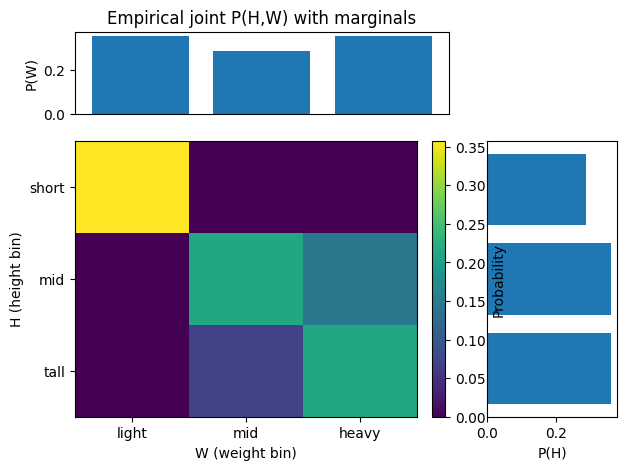

In [9]:
# Joint heatmap with marginals and a correctly attached colourbar
P = pHW.values
row_labels = pHW.index.astype(str).tolist()
col_labels = pHW.columns.astype(str).tolist()

fig = plt.figure(figsize=(7, 5))
gs = gridspec.GridSpec(
    2, 2,
    width_ratios=[4, 1.4],
    height_ratios=[1.2, 4],
    wspace=0.15,
    hspace=0.15
)

ax_top = fig.add_subplot(gs[0, 0])
ax_heat = fig.add_subplot(gs[1, 0])
ax_right = fig.add_subplot(gs[1, 1])

# Top marginal P(W)
ax_top.bar(range(len(col_labels)), pW.values)
ax_top.set_xticks([])
ax_top.set_ylabel("P(W)")
ax_top.set_title("Empirical joint P(H,W) with marginals")

# Heatmap P(H,W)
im = ax_heat.imshow(P, aspect="auto", vmin=0, vmax=P.max())
ax_heat.set_xticks(range(len(col_labels)))
ax_heat.set_xticklabels(col_labels)
ax_heat.set_yticks(range(len(row_labels)))
ax_heat.set_yticklabels(row_labels)
ax_heat.set_xlabel("W (weight bin)")
ax_heat.set_ylabel("H (height bin)")

# Right marginal P(H)
ax_right.barh(range(len(row_labels)), pH.values)
ax_right.set_yticks([])
ax_right.set_xlabel("P(H)")

cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label("Probability")

plt.show()

## Step 7: Independence model

To understand whether two variables are associated, we first ask:

> What would the joint distribution look like if they were completely unrelated?

If height and weight were independent, then knowing a person’s height would tell us nothing about their weight, and vice versa.

In probability terms, independence means that the joint distribution factorises into the product of the marginals:

$$
Q(H,W)=P(H)P(W).
$$

This model $Q$ represents a world in which the variables behave independently.

---

### Constructing the independence model

We already estimated:
- $P(H)$ from the height bins  
- $P(W)$ from the weight bins  

From these we can construct the independence model by taking all pairwise products:

$$
Q(h,w)=P(H=h)\,P(W=w).
$$

This gives a full joint table that reflects what we would expect if:
- height and weight were unrelated  
- the frequency of each pair was determined purely by the separate frequencies of height and weight  

So if 30% of people are tall and 40% are heavy, independence predicts that  
$0.3 \times 0.4 = 0.12$ (12%) of people should be tall and heavy.

---

### Comparing model and reality

We now have two distributions:

- $P(H,W)$  
  the actual joint distribution observed in the data

- $Q(H,W)=P(H)P(W)$  
  the joint distribution we would expect under independence

If height and weight were truly independent, these two tables would be nearly identical.

But in real data we often see systematic differences:
- more mass along the diagonal (e.g. tall–heavy combinations)
- less mass in unlikely combinations (e.g. tall–light)

These differences reflect **dependence**.

---

### Visual comparison

By plotting $P(H,W)$ and $Q(H,W)$ side by side, we can see:

- where the independence model underestimates or overestimates probability  
- how the real data are structured  
- whether there is concentration along certain patterns  

The independence model acts as a baseline or null model.

It tells us what we would expect if there were no relationship at all.

---

### From visual difference to quantitative measure

The next step is to measure how different the two distributions are.

We want a quantity that answers:

> How far is the real joint distribution from what we would expect under independence?

This difference will be quantified using **KL divergence**:

$$
D_{KL}\!\left(P(H,W)\,\|\,P(H)P(W)\right).
$$

This quantity has a special name:

$$
I(H;W)=D_{KL}\!\left(P(H,W)\,\|\,P(H)P(W)\right),
$$

which is the **mutual information** between height and weight.

So mutual information measures how much the real world deviates from the independence assumption.

- If the variables are independent, the two distributions match and the value is zero.
- If they are strongly related, the difference is large.

This provides a principled way to quantify association using probabilities and information.


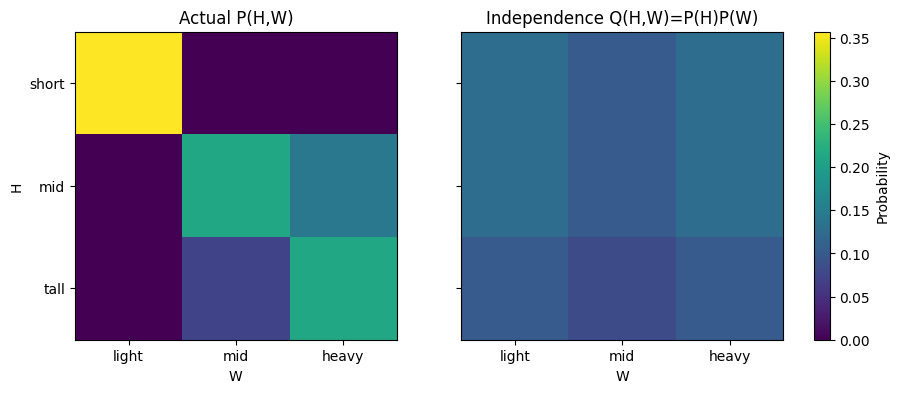

In [10]:
# Side-by-side comparison with a shared colourbar and shared colour scale
P = pHW.values
Q = np.outer(pH.values, pW.values)

vmax = max(P.max(), Q.max())

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

im1 = axes[0].imshow(P, vmin=0, vmax=vmax, aspect="auto")
axes[0].set_title("Actual P(H,W)")
axes[0].set_xticks(range(len(pHW.columns)))
axes[0].set_xticklabels(pHW.columns.astype(str))
axes[0].set_yticks(range(len(pHW.index)))
axes[0].set_yticklabels(pHW.index.astype(str))
axes[0].set_xlabel("W")
axes[0].set_ylabel("H")

im2 = axes[1].imshow(Q, vmin=0, vmax=vmax, aspect="auto")
axes[1].set_title("Independence Q(H,W)=P(H)P(W)")
axes[1].set_xticks(range(len(pHW.columns)))
axes[1].set_xticklabels(pHW.columns.astype(str))
axes[1].set_yticks(range(len(pHW.index)))
axes[1].set_yticklabels([])
axes[1].set_xlabel("W")

cbar = fig.colorbar(im1, ax=axes.ravel().tolist(), fraction=0.046, pad=0.04)
cbar.set_label("Probability")

plt.show()

Notice:
- real data is concentrated along diagonal
- independence spreads mass

This mismatch is exactly what mutual information measures.

## Step 8: Surprise and entropy

We begin with the idea of **surprise**.

If an outcome $x$ has probability $p(x)$, then observing it carries an amount of surprise

$$
s(x) = -\log_2 p(x).
$$

**Intuition**

- Rare events are more surprising  
- Common events are less surprising  
- Surprise is measured in bits: how much information we gain when we see the outcome

For example, if an outcome has probability $1/2$, its surprise is $1$ bit.  
If it has probability $1/8$, its surprise is $3$ bits.

---

### From surprise to entropy

Entropy is simply the **average surprise** of a random variable:

$$
H(X) = \mathbb{E}[s(X)] = -\sum_x p(x)\log_2 p(x).
$$

So entropy measures how surprising a variable typically is.

**Interpretation**

- High entropy  
  Many outcomes are possible and each observation is quite surprising.  
  The variable is hard to predict.

- Low entropy  
  Outcomes are concentrated and predictable.  
  Observations carry little new information.

Entropy therefore plays the same conceptual role for probability distributions that variance plays for numeric variables:

- variance measures spread of values  
- entropy measures spread of probability mass and unpredictability


In [11]:
def entropy(p):
    p = np.array(p).flatten()
    p = p[p>0]
    return -np.sum(p*np.log2(p))

H_H = entropy(pH.values)
H_W = entropy(pW.values)
H_HW = entropy(pHW.values)


H_H, H_W, H_HW

(np.float64(1.5774062828523454),
 np.float64(1.5774062828523454),
 np.float64(2.155968102145908))

## Step 9: KL divergence

We now move from the surprise of a single outcome to the surprise of an entire **model**.

Suppose the true distribution of a variable is $P$, but we model it using another distribution $Q$.  
When we observe data generated from $P$ while believing $Q$, our expected surprise changes.

The **Kullback–Leibler (KL) divergence** measures how much extra surprise we incur by using the wrong model:

$$
D_{KL}(P \| Q) = \sum_x p(x)\log_2\frac{p(x)}{q(x)}.
$$

This is the expected log difference between:
- what actually happens under $P$
- what we would expect under $Q$

---

### Interpretation

- If $P = Q$, then  
  $$
  D_{KL}(P \| Q) = 0
  $$
  because our model perfectly matches reality.

- If $Q$ assigns low probability to events that actually occur often under $P$,  
  then we are frequently surprised and the KL divergence is large.

- KL divergence is always non-negative and measures **model mismatch**.

It is not symmetric:

$$
D_{KL}(P \| Q) \neq D_{KL}(Q \| P).
$$

This reflects the idea that “assuming $Q$ when reality is $P$” is different from the reverse.

---

### Connection to surprise and entropy

Recall that entropy measures expected surprise under the true distribution:

$$
H(P) = -\sum_x p(x)\log_2 p(x).
$$

If we instead encode data using model $Q$, the expected surprise becomes

$$
-\sum_x p(x)\log_2 q(x).
$$

The difference between these two quantities is exactly the KL divergence:

$$
D_{KL}(P \| Q)
=
-\sum_x p(x)\log_2 q(x)
-
\left(-\sum_x p(x)\log_2 p(x)\right).
$$

So KL divergence is the **extra number of bits** we need when we use the wrong model.

---

### In our height–weight example

We compare two distributions:

- $P(H,W)$  
  the actual joint distribution of height and weight bins

- $Q(H,W) = P(H)P(W)$  
  the distribution we would have if height and weight were independent

If height and weight were truly independent, these two would match.  
But in real data they do not: taller people tend to be heavier.

So the KL divergence

$$
D_{KL}\!\left(P(H,W) \,\|\, P(H)P(W)\right)
$$

measures how far the real world is from the independence assumption.

This quantity has a special name:

$$
I(H;W) = D_{KL}\!\left(P(H,W)\,\|\,P(H)P(W)\right),
$$

which we will recognise in the next step as **mutual information**.

In words:

> KL divergence tells us how surprised we are if we assume independence when the variables are actually associated.


In [12]:
def kl(P,Q):
    P = P.flatten()
    Q = Q.flatten()
    mask = P>0
    return np.sum(P[mask]*np.log2(P[mask]/Q[mask]))

KL = kl(P,Q)
KL

np.float64(0.9988444635587826)

## Step 10: Mutual information

We now arrive at the central quantity for measuring association between variables.

The **mutual information** between two variables $X$ and $Y$ is defined as

$$
I(X;Y) = D_{KL}\!\left(P_{XY} \,\|\, P_X P_Y\right).
$$

This compares:
- the true joint distribution $P_{XY}$
- the distribution we would have if the variables were independent, $P_X P_Y$

So mutual information measures how far reality is from independence.

---

### Interpretation in terms of surprise

If $X$ and $Y$ were independent, then knowing $X$ would not change our expectation about $Y$.  
The joint distribution would factorise as $P_X P_Y$.

But when they are associated, observing $X$ changes how surprised we are by values of $Y$.

Mutual information quantifies the **average reduction in surprise** about one variable when we observe the other.

In bits, it tells us:

> How many bits of uncertainty about $Y$ are removed, on average, when we learn $X$.

---

### Equivalent formulations

Mutual information can be written in several equivalent ways.

**As a KL divergence**
$$
I(X;Y) = \sum_{x,y} p(x,y)\log_2 \frac{p(x,y)}{p(x)p(y)}.
$$

**As reduction in entropy**
$$
I(X;Y) = H(X) - H(X\mid Y)
       = H(Y) - H(Y\mid X).
$$

This form makes the interpretation especially clear:

- $H(Y)$ is the uncertainty in $Y$ before we know $X$
- $H(Y\mid X)$ is the remaining uncertainty after we know $X$

So the difference is how much uncertainty is removed.

**Symmetric form**
$$
I(X;Y) = H(X) + H(Y) - H(X,Y).
$$

This shows that mutual information measures how much total uncertainty is shared between the variables.

---

### Intuition via the height–weight example

Suppose we want to guess a person's weight.

- Without knowing height, our uncertainty is large.
- If we are told the height, our uncertainty shrinks.

That reduction in uncertainty is exactly the mutual information between height and weight.

If height and weight were independent:
$$
I(H;W)=0.
$$

If height perfectly determined weight:
$$
I(H;W)=H(W).
$$

In real data, we get a value between these extremes, indicating partial but meaningful association.

---

### Relation to classical statistics

In classical statistics we often measure association using covariance or correlation.  
These capture **linear** relationships.

Mutual information is more general:
- it detects nonlinear relationships
- it applies to discrete or continuous variables
- it has a direct interpretation in bits of uncertainty

For jointly Gaussian variables with correlation $\rho$, mutual information reduces to

$$
I(X;Y) = -\tfrac{1}{2}\log_2(1-\rho^2),
$$

showing that correlation is a special-case summary of dependence.

---

### Key conceptual takeaway

Mutual information answers a fundamental question:

> How much does knowing one variable help us predict another?

It is zero when variables are independent.  
It increases as their relationship becomes stronger.

This provides a principled way to:
- quantify association  
- detect redundancy  
- understand why dimensionality can be reduced when variables share information.


In our specific definition of KL divergence,

In [13]:
I = KL
I

np.float64(0.9988444635587826)

## Step 11: Total correlation

So far we have measured how two variables share information.  
We now extend this idea to **many variables**.

The **total correlation** (also called multi-information) of variables  
$X_1, X_2, \dots, X_d$ is defined as

$$
TC(X_1,\dots,X_d)=\sum_{i=1}^{d} H(X_i) - H(X_1,\dots,X_d).
$$

---

### What this measures

- $\sum_i H(X_i)$  
  is the total uncertainty we would have if we treated all variables separately

- $H(X_1,\dots,X_d)$  
  is the uncertainty when we consider them jointly

If the variables are independent, then

$$
H(X_1,\dots,X_d)=\sum_i H(X_i),
$$

so

$$
TC=0.
$$

If they share information, the joint entropy is smaller than the sum of individual entropies, and

$$
TC>0.
$$

So total correlation measures how much uncertainty is **shared or redundant** across variables.

---

### Relation to mutual information

For two variables,

$$
TC(X,Y)=H(X)+H(Y)-H(X,Y)=I(X;Y).
$$

So mutual information is simply the two-variable case of total correlation.

For three or more variables, total correlation captures all shared dependence, including higher-order interactions that may not be visible from pairwise mutual information alone.

---

### Interpretation

Total correlation answers the question:

> How much information is duplicated across the variables?

If many variables carry overlapping information, then knowing some of them reduces uncertainty about the others.  
This makes the joint entropy smaller than the sum of individual entropies.

A large value of $TC$ indicates:
- redundancy
- shared structure
- predictable relationships across variables

A small value indicates:
- near independence
- little shared information

---

### Example intuition

Imagine three variables:

- height  
- weight  
- BMI  

BMI is derived from height and weight, so it carries information already present in the other two variables.

If we treat all three separately, we would count their uncertainty three times.  
But because BMI is largely determined by height and weight, the joint uncertainty is smaller.

Total correlation measures exactly this redundancy.

---

### Why this matters

Total correlation provides a principled way to understand:

**Redundancy**
If multiple variables carry similar information, the total correlation is high.

**Dimensionality reduction**
If $TC$ is large, then some variables can be removed or compressed without losing much information.

**Feature learning**
Many representation learning methods aim to transform data so that:
- relevant information is preserved
- redundant dependence is reduced

This can be seen as controlling or redistributing total correlation across features.

---

### Alternative KL divergence view

Total correlation can also be written as a KL divergence:

$$
TC(X_1,\dots,X_d)
=
D_{KL}\!\left(
P_{X_1,\dots,X_d}
\;\middle\|\;
\prod_i P_{X_i}
\right).
$$

So it measures how far the joint distribution is from the model in which all variables are independent.

This generalises the mutual information identity:

$$
I(X;Y)=D_{KL}\!\left(P_{XY}\,\|\,P_XP_Y\right).
$$

---

### Key takeaway

Total correlation is the multi-variable generalisation of mutual information.

It quantifies:

> How much information is shared across a collection of variables beyond what each variable contains on its own.

When this value is large, the variables are strongly linked and partially redundant.  
When it is zero, they are independent.
